In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab5.ipynb")

# Lab 5: Modeling and Estimation

In this lab you will work with the tips dataset in order to:
1. Implement a basic model, define loss functions
1. Minimize loss functions using numeric libraries 

## Setup

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")

# Loading the Tips Dataset

To begin with, we load the tips dataset from the `seaborn` library.  The tips data contains records of tips, total bill, and information about the person who paid the bill.

In [3]:
data = sns.load_dataset("tips")

print("Number of Records:", len(data))
data.head()

Number of Records: 244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Question 1: Defining the Model 

In lecture we modeled the percent tip.  In this lab we will instead attempt to model the tip value (in dollars) as a function of the total bill.  As a consequence we define the following mathematical model:

$$\Large
\texttt{Tip} = \theta^*  \times \texttt{TotalBill}
$$

This follows the similar intuition that tips are some **unknown** percentage of the total bill.  We will then try to estimate the slope of this relationship which corresponds to the percent tip.

Here the parameter $\theta^*$ represents the true percent tip that we would like to estimate.  

**Implement the python function for this model (yes this is very easy):**

<!--
BEGIN QUESTION
name: q1
manual: false
points: 3
-->

In [19]:
def model(theta, total_bill):
    """
    Takes the parameter theta and the total bill, and returns the computed tip.
    
    Parameters
    ----------
    theta: tip percentage 
    total_bill: total bill value in dollars
    """
    return theta * total_bill

In [20]:
grader.check("q1")

q1 passed!

# Loss Functions

A loss function is what we use to compare different outcomes $f(\theta)$ given some value of $\theta$. (In lecture, some examples of variable $\theta$ were portfolio allocation, amount of goods in a transportation problem, etc.)

Recall that, in the movie recommender system, we minimized _squared error of estimated movie ratings_: i.e.,
\begin{align*}
\min_{U,V} \left\{ \sum_{i=1}^I\sum_{m=1}^M (r_{im} - \hat r_{im})^2 \right\} =
\min_{U,V} \left\{ \sum_{i=1}^I\sum_{m=1}^M (r_{im} - u_i^T v_m)^2 \right\},
\end{align*}
where $U$ and $V$ jointly are the variables. Note that we compute the discrepancy between estimated ratings ($\hat r_{im} = u_i^T v_m$) and observed rating $r_{ij}$ by the sum of squared errors. This is also called the squared-loss. 

In this lab we will study the _choice of the squared loss vs. the absolute loss functions_ when finding the $\theta$ that explains data the _best_. In this tips data, $x$ and $y$ are given, and we want to find the best $\theta$. **Hence, $\theta$ is the variable.**

Suppose for a given total bill $x$, we observe a tip value of $y$ and our model predicts a tip value $\hat{y}$ by:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = \theta x
$$ 
then any of the following might be appropriate **loss functions**

1. **Squared Loss** (also known as the $L^2$ loss pronounced "ell-two"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$
1. **Absolute Loss** (also known as the $L^1$ loss pronounced "ell-one"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

In this lab we will compute two _best_ $\theta$'s. They are,
1. The _best_ $\theta$ in **squared loss-sense**
1. The _best_ $\theta$ in **absolute loss-sense**

## Question 2a: Implement the squared loss function

In this question, you are going to define functions for **squared loss** and **absolute loss**. 

$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$

Using the comments below, implement the squared loss function. Your answer should not use any loops.

<!--
BEGIN QUESTION
name: q2a
manual: false
points: 3
-->

In [8]:
def squared_loss(y_obs, y_hat):
    """
    Calculate the squared loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the squared loss for each prediction
    """
    return (y_obs-y_hat)**2

In [9]:
grader.check("q2a")

q2a passed!

## Question 2b: Plotting Squared Loss

Suppose you observe a bill of \\$28 with a tip \\$3. (Does this tip look reasonable?)

Transform this information in our model, we have a $y=3.00$ and $x=28.00$. Now suppose we pick an initial range of $\theta$'s (tip percent in this case) for you. Use the `model` and `squared_loss` function defined above to plot the loss for a range of $\theta$ values:

<!--
BEGIN QUESTION
name: q2b
manual: false
points: 3
-->

In [13]:
y = 3.00
x = 28.00
thetas = np.linspace(0, 0.3, 200) # A range of theta values

## Finish this by replacing 0.0 with the correct calculation 
## Hint: You will use squared_loss y, model, theta and x
#loss should be a numpy array where the ith entry corresponds to the loss for the ith theta
loss = np.array([ 0.0 for theta in thetas])
predicted_tip = model(thetas,x)
loss = squared_loss(y, predicted_tip)

In [14]:
grader.check("q2b")

q2b passed!

To test your loss calculation above, run the cell below, and it should produce this picture:

![squared loss](squared_loss.png)

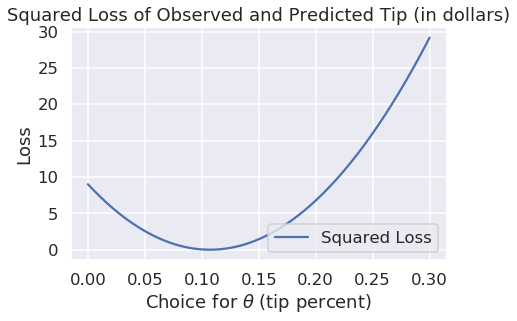

In [15]:
plt.plot(thetas, loss, label="Squared Loss")
plt.title("Squared Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $\theta$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("squared_loss_my_plot.png",  bbox_inches = 'tight')

## Question 2c: Implement the absolute loss 

$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

<!--
BEGIN QUESTION
name: q2c
manual: false
points: 3
-->

In [16]:
def abs_loss(y_obs, y_hat):
    """
    Calculate the absolute loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the absolute loss for each prediction
    """
    return(abs(y_obs-y_hat))

In [17]:
grader.check("q2c")

q2c passed!

Below is the plot of the absolute loss.  If you implemented things correctly it should look like:

![absolute loss](absolute_loss.png)


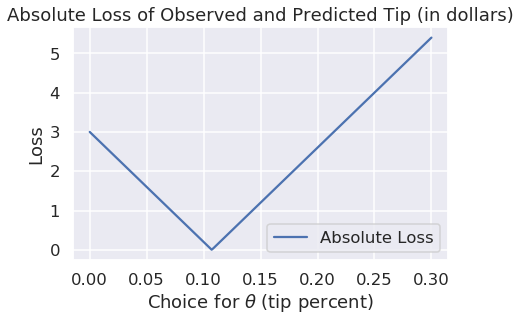

In [18]:
y = 3.00
x = 28.00
thetas = np.linspace(0, 0.3, 200) 

# Code provided for you this time. (you're welcome)
loss = np.array([abs_loss(y, model(theta,x)) for theta in thetas])

plt.plot(thetas, loss, label="Absolute Loss")
plt.title("Absolute Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $\theta$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("absolute_loss_my_plot.png",  bbox_inches = 'tight')


## Question 2d: Plotting **Average Loss** for our Data
Remember we define our model to be:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = \theta x
$$ 
Now, we can extend the above loss functions to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large
\mathcal{D} = \{(x_1, y_1), \ldots, (x_n, y_n)\}
$$

where $x_i$ is the total bill and $y_i$ is the tip dollar amount.

We can define the average loss over the dataset as:

$$\Large
L\left(\theta, \mathcal{D}\right) = \frac{1}{n} \sum_{i=1}^n L(m_\theta(x_i), y_i) = \frac{1}{n} \sum_{i=1}^n L(\theta x_i, y_i) = \frac{1}{n} \sum_{i=1}^n L(\hat{y_i}, y_i)
$$

where $m_\theta(x_i) = \theta x_i = \hat{y_i}$ is the model evaluated using the parameters $\theta$ on the bill amount $x_i$.

**Complete the following code block to render a plot of the average absolute and squared loss for different values of $\theta$**



In [24]:
thetas = np.linspace(0, 0.3, 200) # A range of theta values
y = data['tip']
x = data['total_bill']

# Replace 0.0 with the correct value computed 
# Use the model and loss functions from above

# This time, each loss array should be a numpy array where the ith entry corresponds to the 
# average loss across all data points for the ith theta

avg_squared_loss = np.array([0.0 for theta in thetas])
avg_absolute_loss = np.array([0.0 for theta in thetas])

avg_squared_loss = np.array([np.mean(squared_loss(y, model(theta,x))) for theta in thetas])
avg_absolute_loss = np.array([np.mean(abs_loss(y, model(theta, x))) for theta in thetas])

<!-- BEGIN QUESTION -->

To test your loss calculations, run the cell below. If your code was correct, the following plot should look like:

![Average Loss](average_loss.png)

Note: Your colors might be different.

<!--
BEGIN QUESTION
name: q2d
manual: true
points: 3
-->

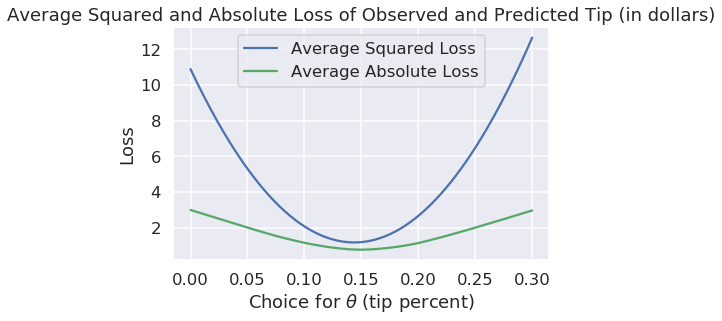

In [26]:
plt.plot(thetas, avg_squared_loss, label = "Average Squared Loss")
plt.plot(thetas, avg_absolute_loss, label = "Average Absolute Loss", color = "g")
plt.title("Average Squared and Absolute Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $\theta$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend()
plt.savefig("average_loss_my_plot.png",  bbox_inches = 'tight')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Based on the plot above, approximately what is the optimal value of theta you would choose for this model?**

<!--
BEGIN QUESTION
name: q2d2
manual: true
points: 3
-->

In [27]:
q2d2 = "15%" # answer question here as a string

<!-- END QUESTION -->

# Question 3: Minimizing The Loss

In class, we used calculus to make improvements to our solution until convergence; however, there are specialized functions that are specifically designed to compute $\theta$ that minimize the loss function.  In this lab we will use computational techniques to minimize the loss.  Here we will use the [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) routine to minimize the average loss.

Complete the following python function:

<!--
BEGIN QUESTION
name: q3
manual: false
points: 3
-->

In [32]:
from scipy.optimize import minimize

def minimize_average_loss(loss_function, model, x, y):
    """
    Minimize the average loss calculated from using different thetas, and 
    find the estimation of theta for the model.
    
    Parameters
    ------------
    loss_function: A loss function, can be the squared or absolute loss function from above.
    model: A defined model function, here we use the model defined above
    x: the x values (total bills)
    y: the y values (tip amounts)
    
    Returns
    -----------
    The estimation for theta (tip percent) as a scalar
    
    Note we will ignore failed convergence for this lab ... 
    """
    
    ## Notes on the following function call which you need to finish:
    # 
    # 0. the ... should be replaced with the average loss evaluated on 
    #       the data x, y using the model and appropriate loss function
    # 1. x0 is the initial value for THETA.  Yes, this is confusing
    #       but people who write optimization libraries like to use x  
    #       as the variable name to optimize, not theta.
    
    
    return minimize(lambda theta: np.mean(loss_function(y, model(theta,x))), x0=0.0)['x'][0] # We extract 'x' entry in dict, which contains optimal theta

In [33]:
grader.check("q3")

q3 passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [34]:
grader.check_all()

q1 passed!

q2a passed!

q2b passed!

q2c passed!

q3 passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()